<h1><b>Libraries</b></h1>

In [1]:
import os #paths to file
from time import time
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
#ignore warnings influence output print
warnings.filterwarnings("ignore")

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#relevant ML libraries
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

<h1><b>Preprocessing and Data Analysis</b></h1>

<h2>Read datasets from files</h2>

In [2]:
for dirname, _, filenames in os.walk('/Bank_Marketing_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# path for the training set
data_path = "./Bank_Marketing_Dataset/train.csv"
# path for the test set
test_path = "./Bank_Marketing_Dataset/test.csv"
# read in csv file as a DataFrame
data = pd.read_csv(data_path)
test = pd.read_csv(test_path)
# explore the first 5 rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,24,management,single,university.degree,no,yes,no,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,no
1,48,entrepreneur,married,university.degree,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
2,29,technician,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
3,30,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
4,44,entrepreneur,married,university.degree,no,yes,no,cellular,nov,wed,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


<h2>Missing values and Repeat values</h2>

In [3]:
#missing values in decsending order
data.isnull().sum().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [4]:
# duplicate rows
data_dup=data[data.duplicated(keep='last')]
print(data_dup.size)
# drop duplicate rows
data=data.drop_duplicates()
data.shape

0


(5000, 21)

We are lucky that this dataset has no missing/null or serious problems

<h1><b>Data Analyzing</b></h1>

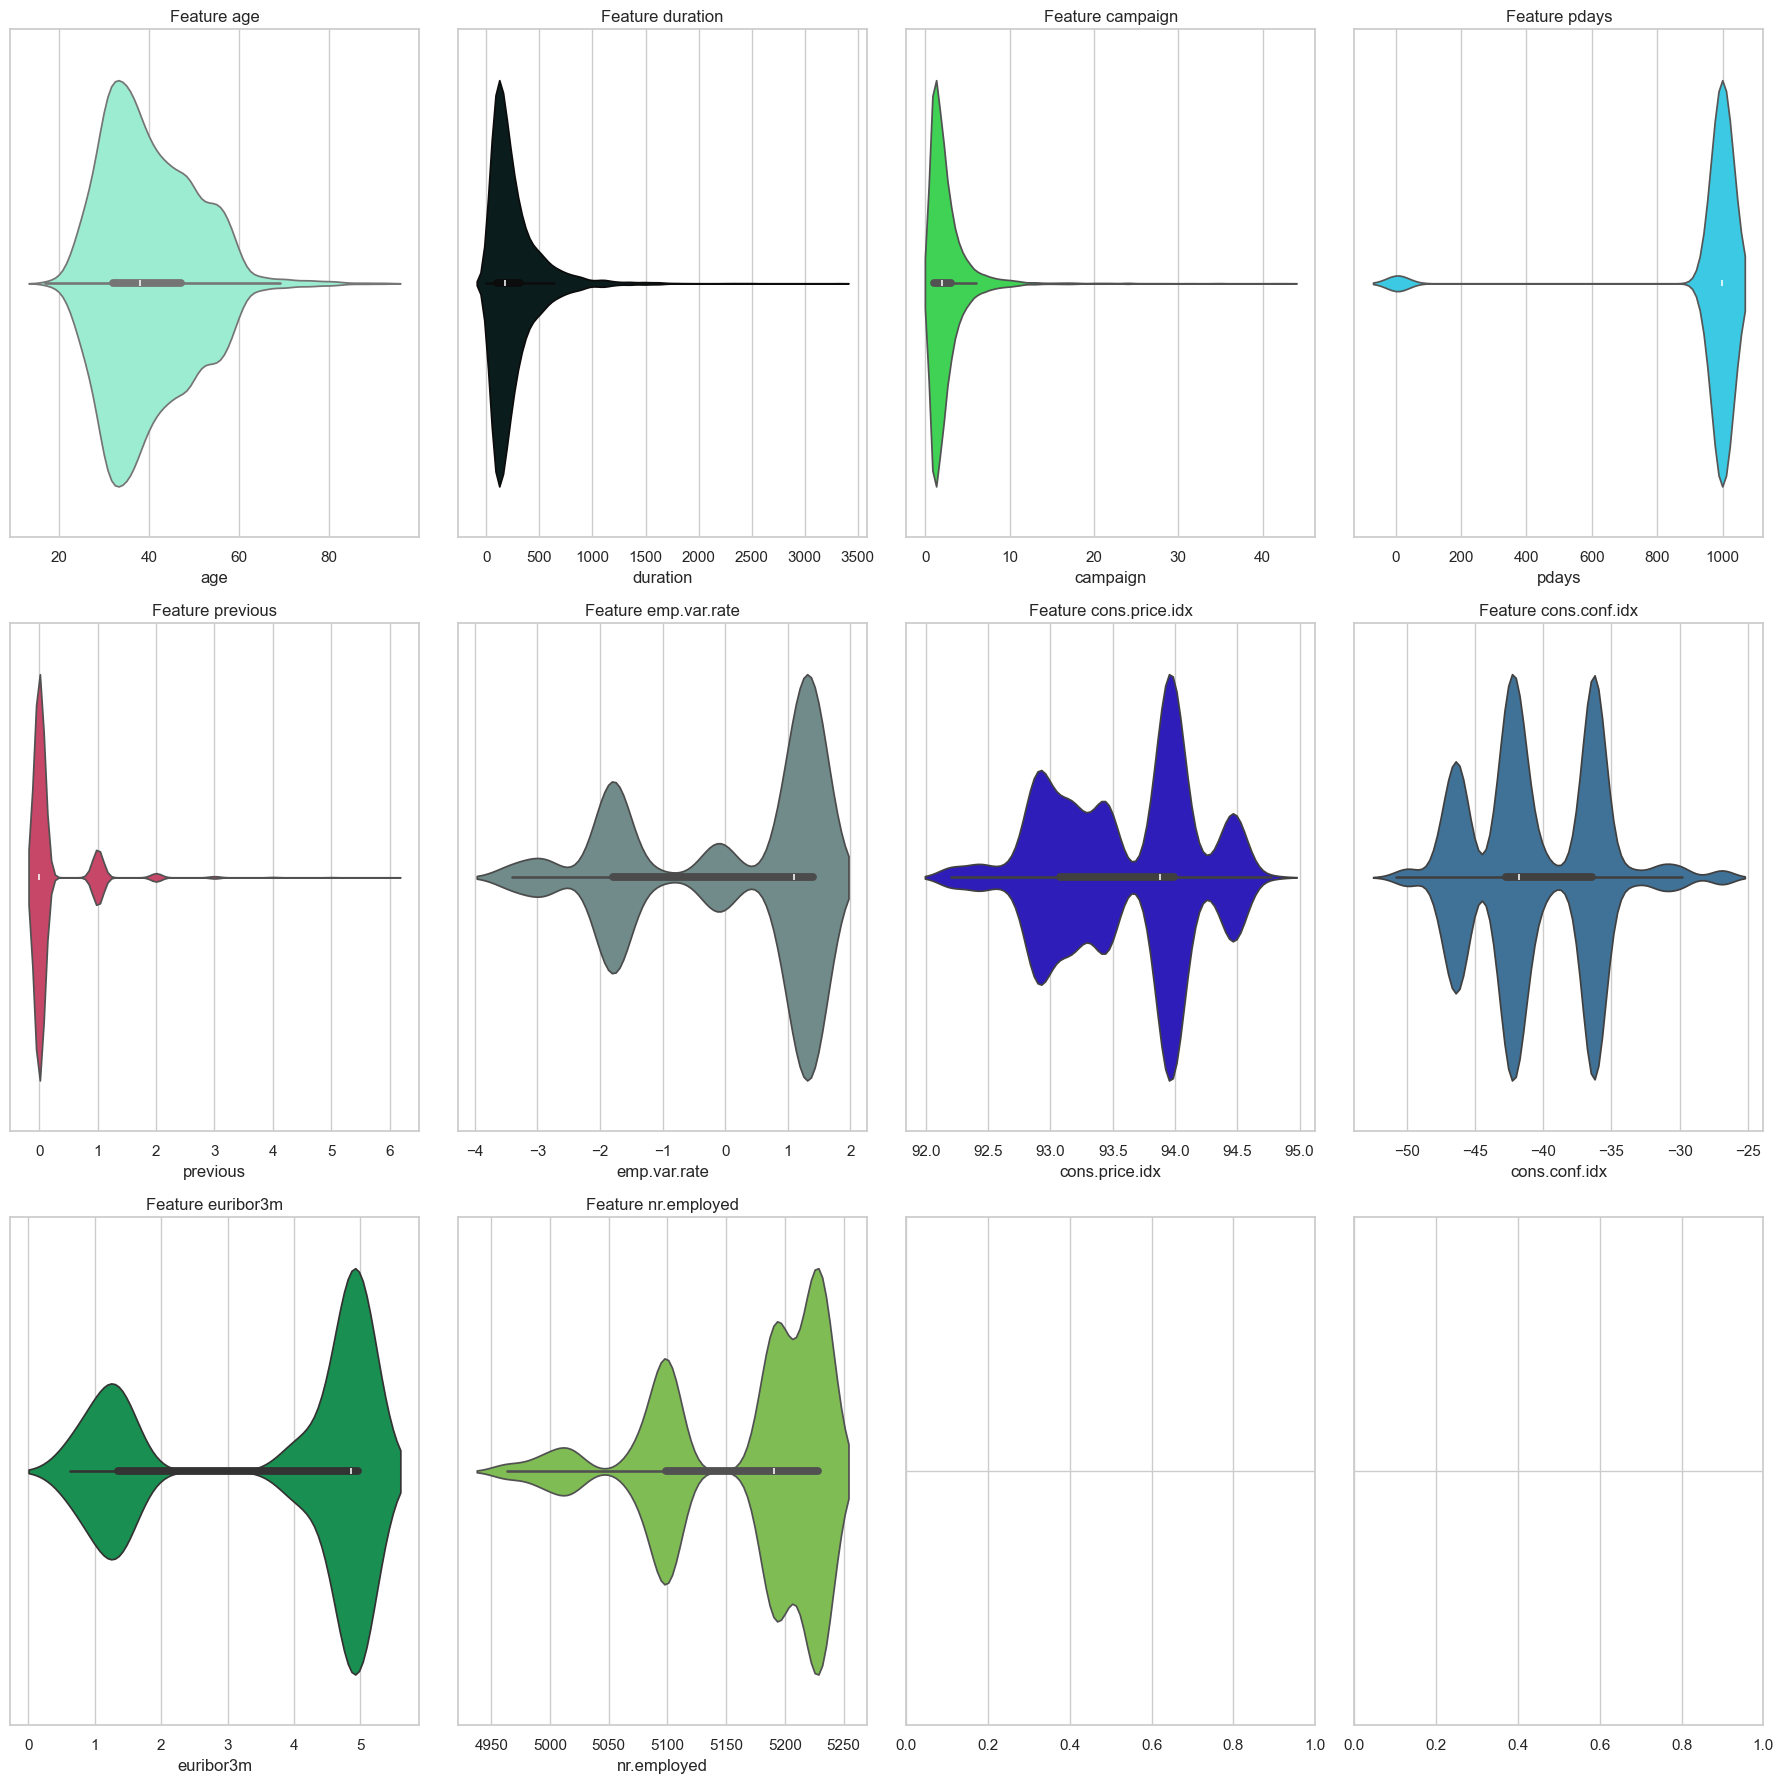

In [5]:
num_vars = data.select_dtypes(include=['number'])
sns.set(style='whitegrid')  
fig, axes = plt.subplots(3, 4, figsize=(18, 18), sharey=True) 

axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=data[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'Feature {feature}')  

plt.tight_layout()
plt.show()

In [6]:
# duration
# Outliers were handled. This can help with cleaning and preparing data
min_Duration = data['duration'].min()
max_Duration = data['duration'].max()
data.loc[data['duration']<1, 'duration']=min_Duration
data.loc[data['duration']>1000, 'duration']=min_Duration

min_Duration = test['duration'].min()
max_Duration = test['duration'].max()
test.loc[test['duration']<1, 'duration']=min_Duration
test.loc[test['duration']>1000, 'duration']=min_Duration

# campaign
# Outliers were handled. This can help with cleaning and preparing data
min_Duration = data['campaign'].min()
max_Duration = data['campaign'].max()
data.loc[data['campaign']<1, 'campaign']=min_Duration
data.loc[data['campaign']>10, 'campaign']=min_Duration

min_Duration = test['campaign'].min()
max_Duration = test['campaign'].max()
test.loc[test['campaign']<1, 'campaign']=min_Duration
test.loc[test['campaign']>10, 'campaign']=min_Duration

# pdays
# Outliers were handled. This can help with cleaning and preparing data
min_Duration = data['pdays'].min()
max_Duration = data['pdays'].max()
data.loc[data['pdays']<1, 'pdays']=0
data.loc[data['pdays']>25, 'pdays']=0

min_Duration = test['pdays'].min()
max_Duration = test['pdays'].max()
test.loc[test['pdays']<1, 'pdays']=0
test.loc[test['pdays']>25, 'pdays']=0

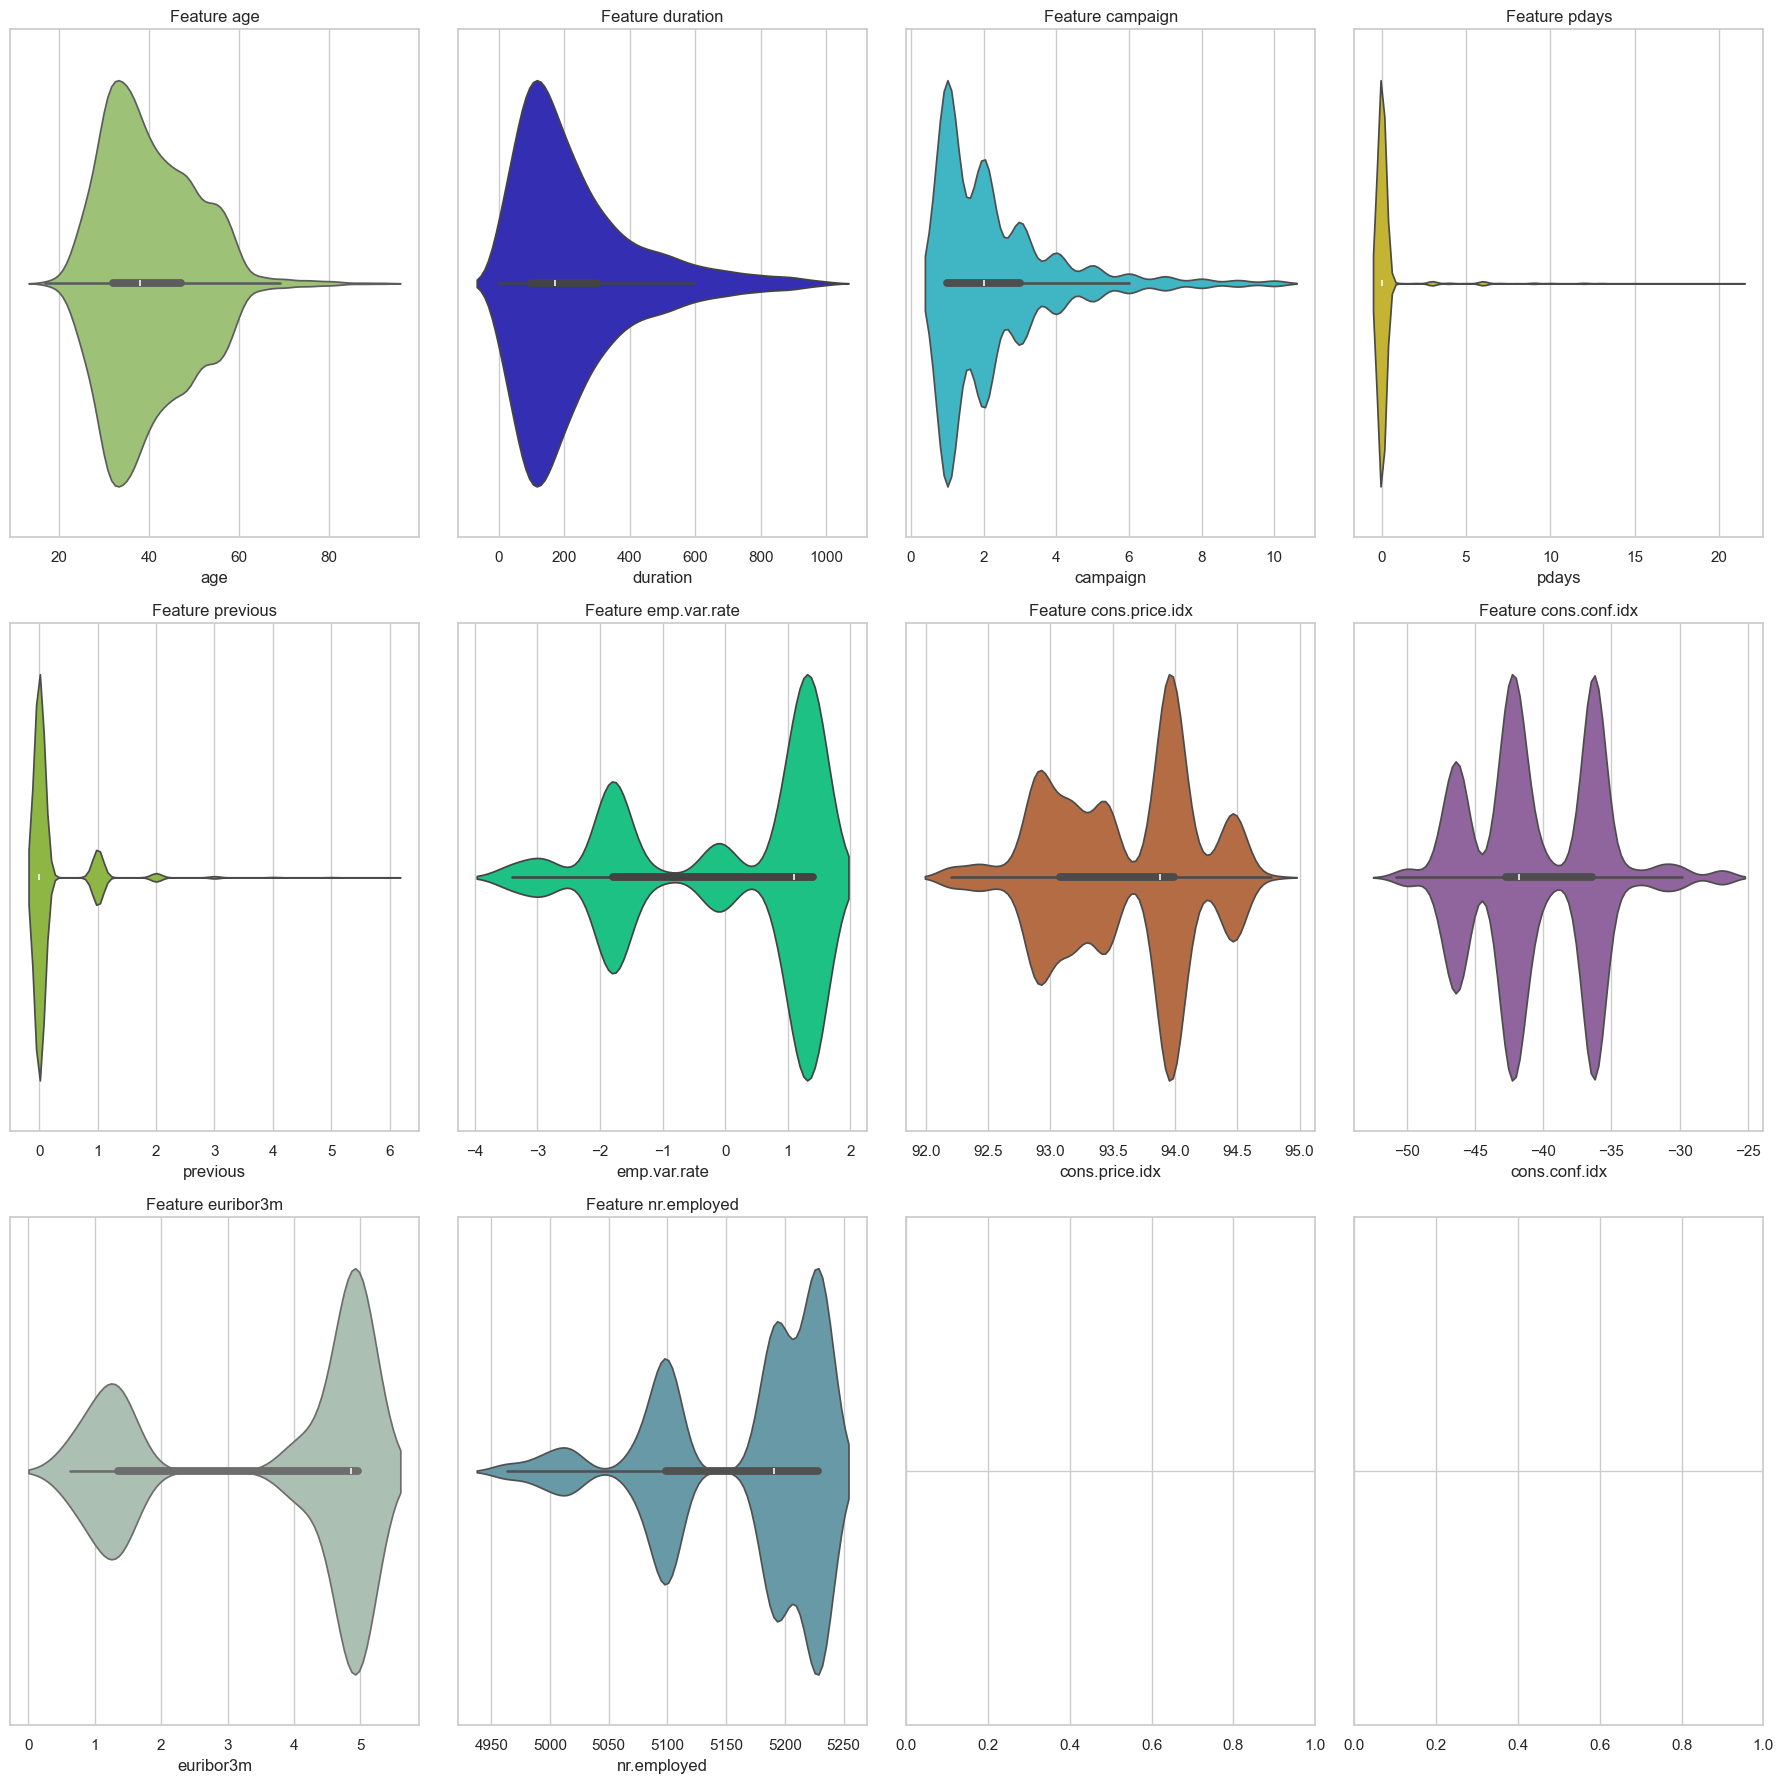

In [7]:
num_vars = data.select_dtypes(include=['number'])
sns.set(style='whitegrid')  
fig, axes = plt.subplots(3, 4, figsize=(18, 18), sharey=True) 

axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=data[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'Feature {feature}')  

plt.tight_layout()
plt.show()

<h1><b>Data visalization</b></h1>

y
no     4420
yes     580
Name: count, dtype: int64


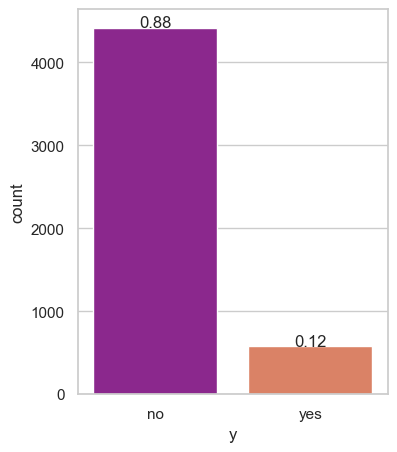

In [8]:
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = data.select_dtypes('object').columns.to_list()
#numeric df
loan_num = data[num]
#categoric df
loan_cat = data[cat]

print(data[cat[-1]].value_counts())
total = float(len(data[cat[-1]]))
plt.figure(figsize=(4,5))
sns.set(style="whitegrid")
ax = sns.countplot(x=cat[-1] ,hue='y', data=data ,palette='plasma')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

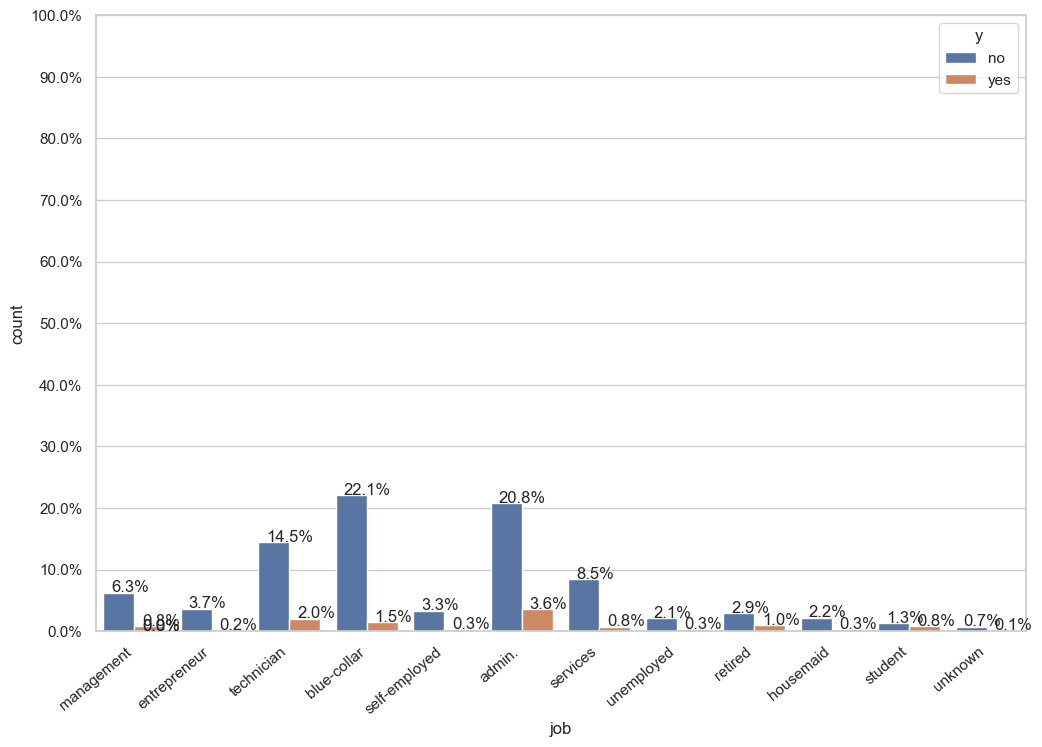

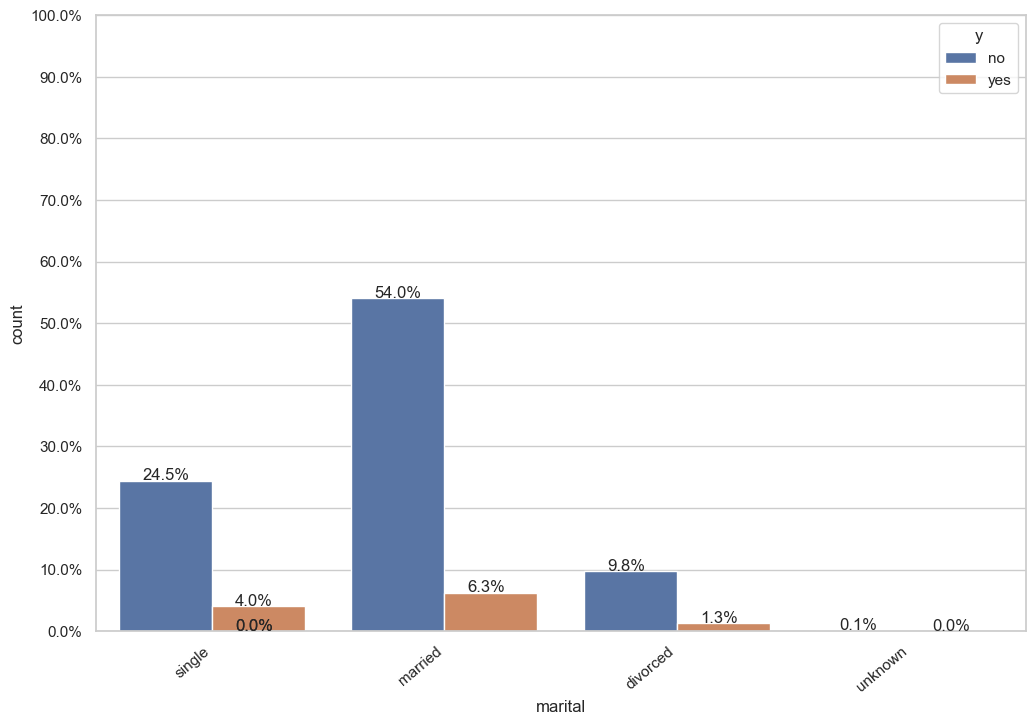

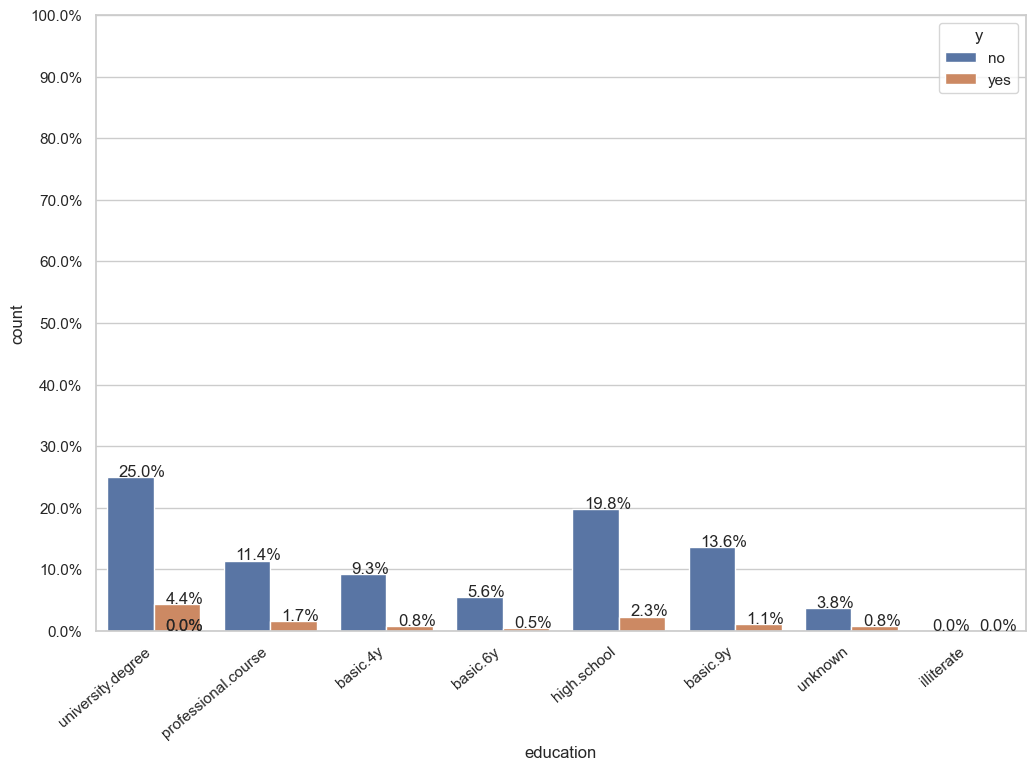

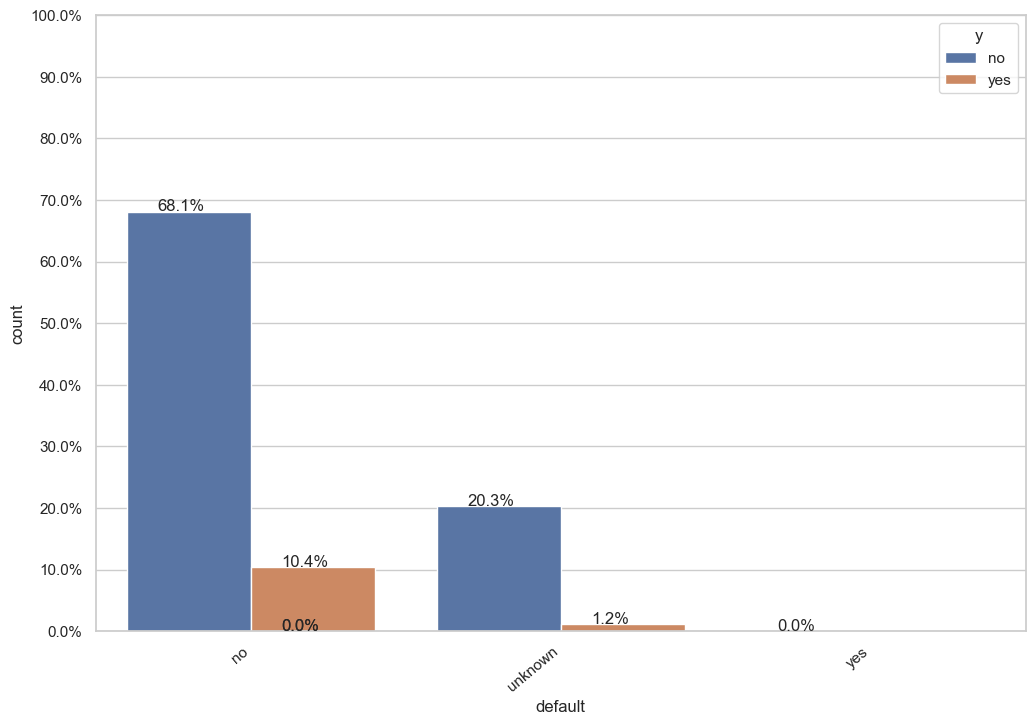

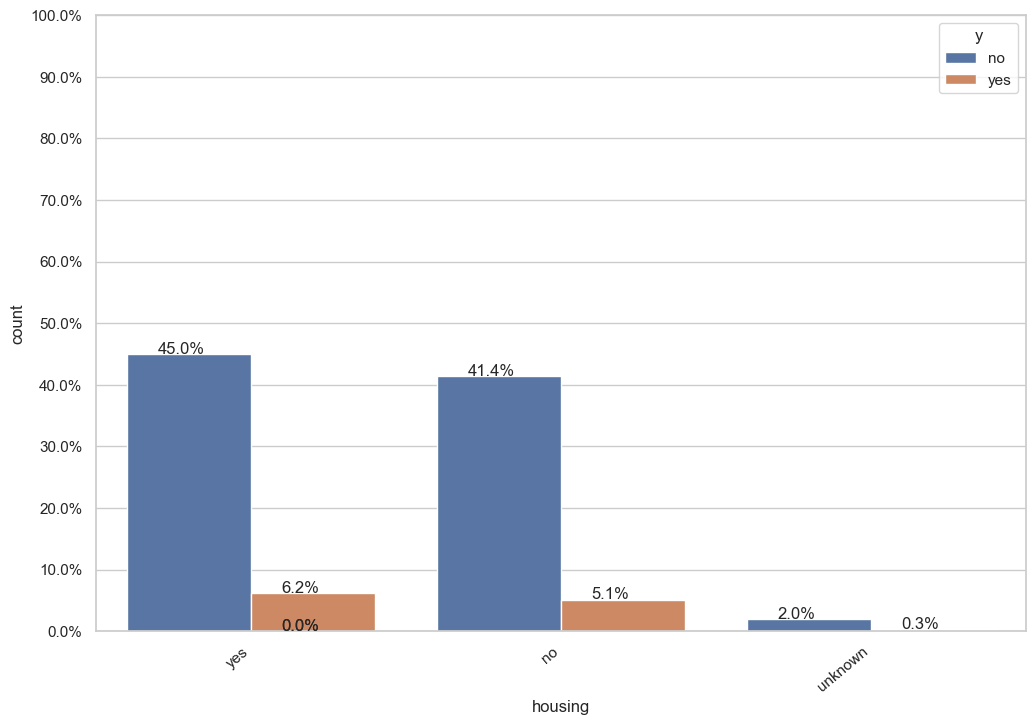

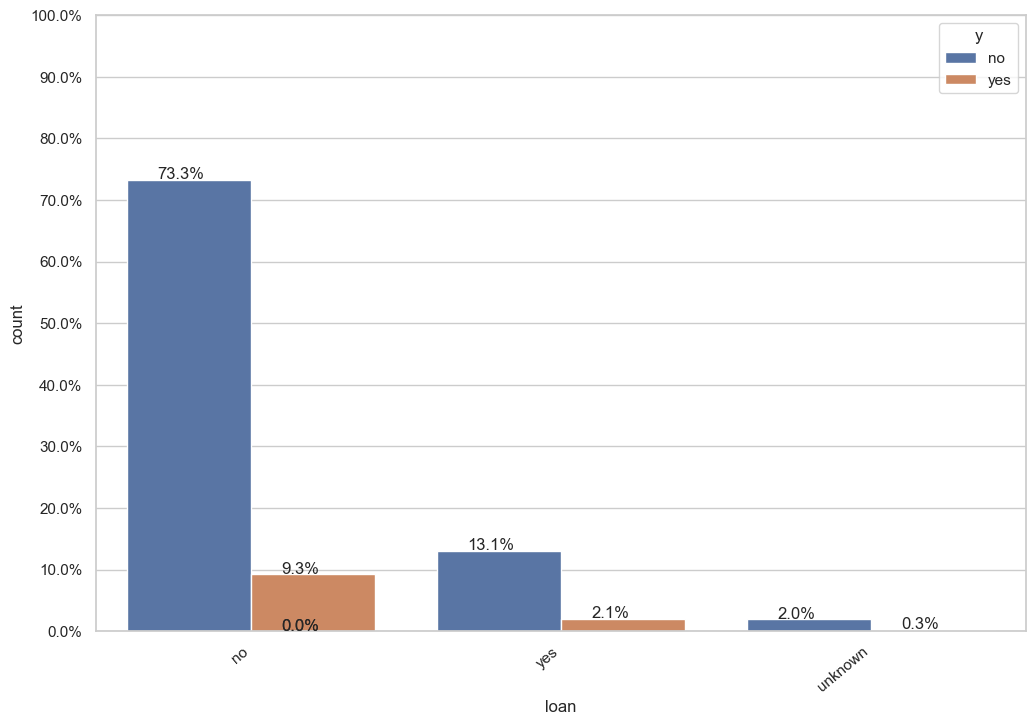

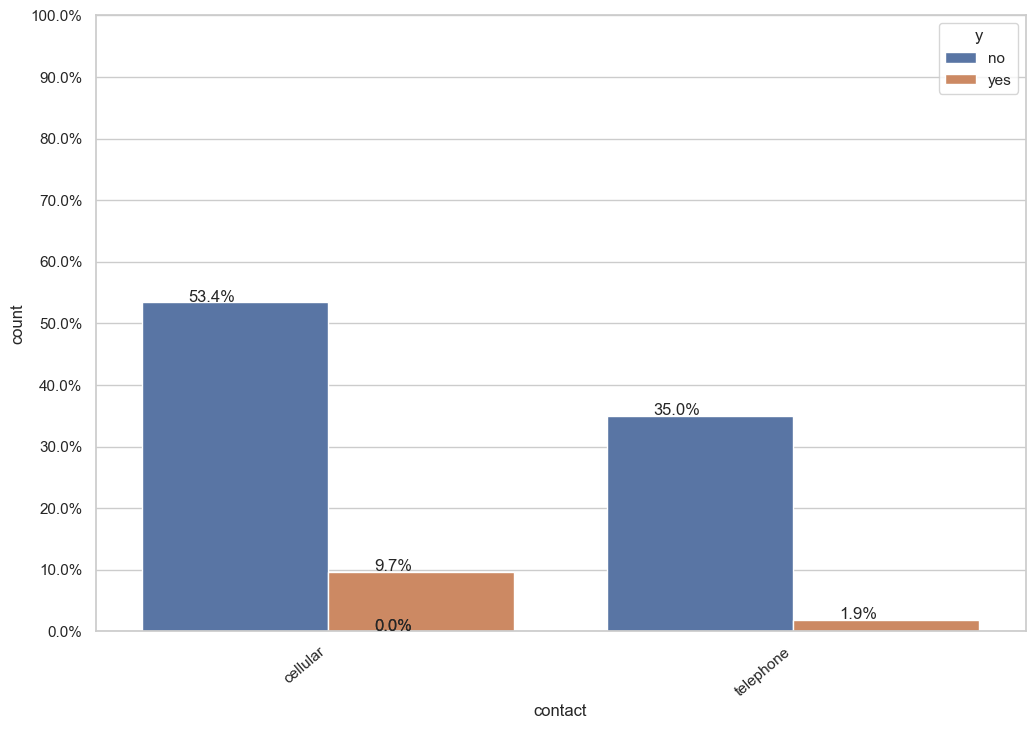

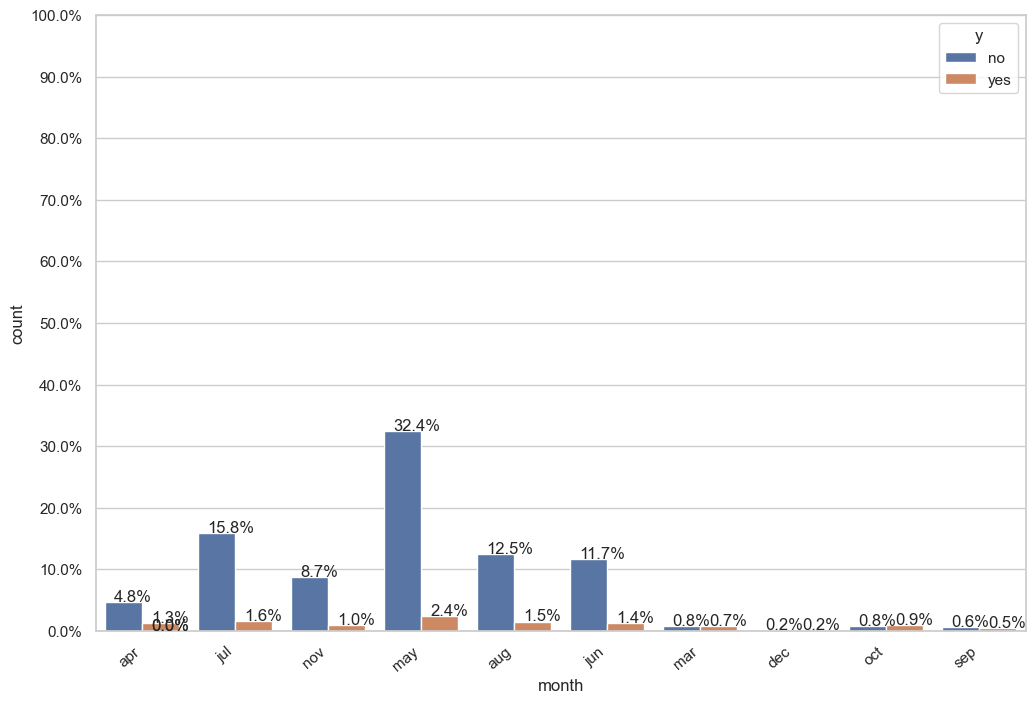

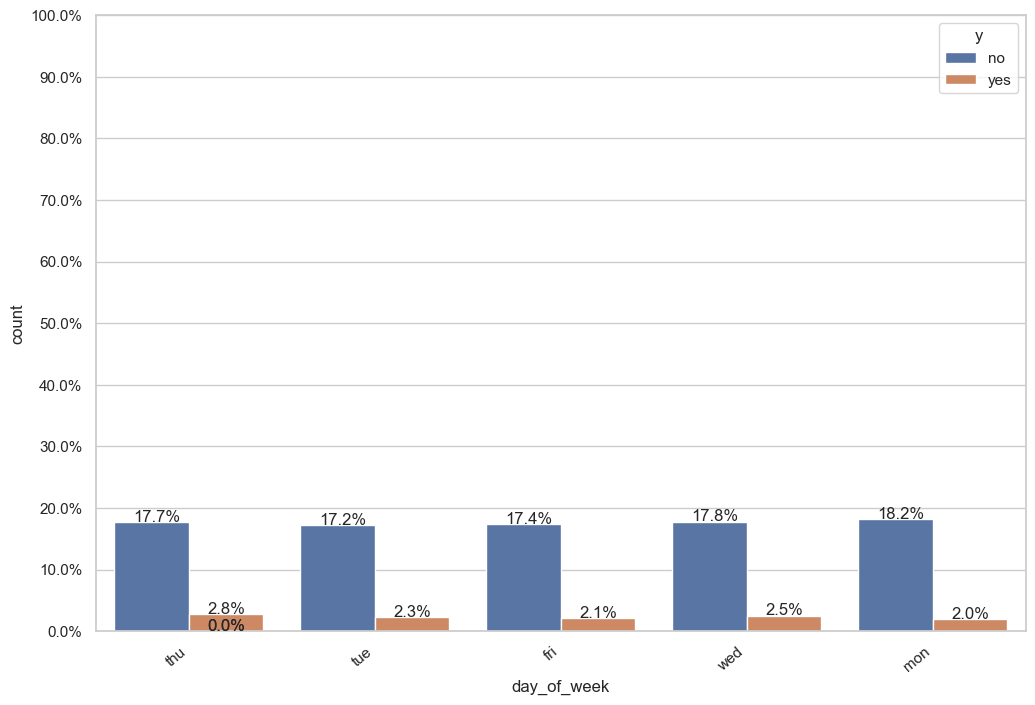

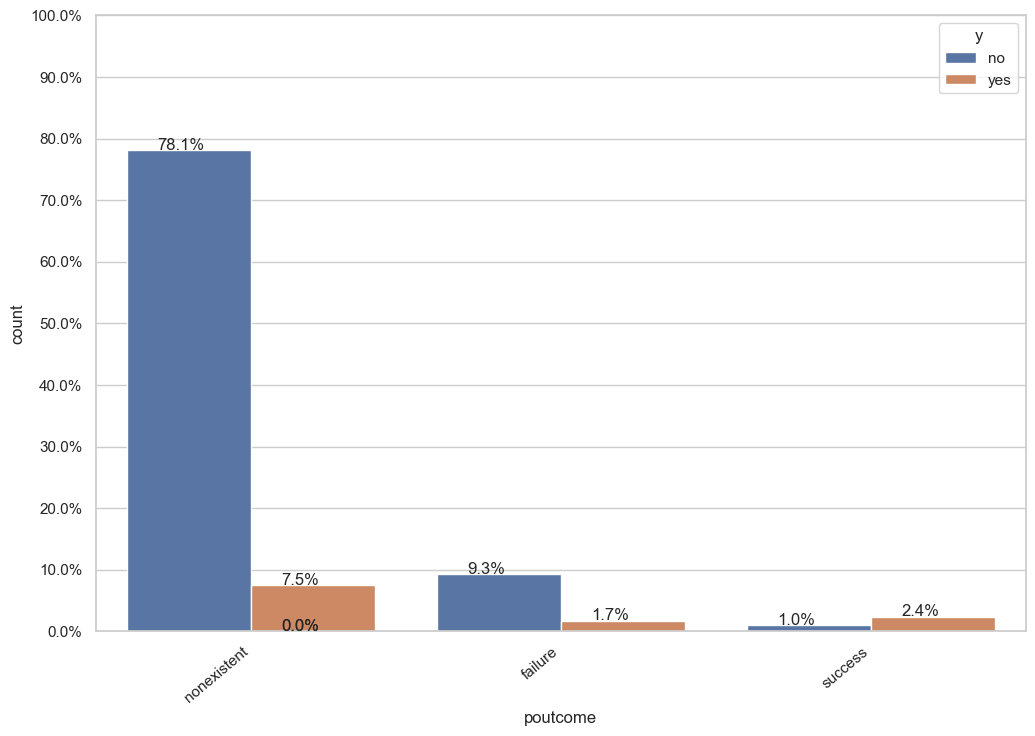

In [9]:
%matplotlib inline

def countplot_withY(label, data):
  plt.figure(figsize=(12,8))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=data, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','day_of_week','poutcome']
for idx,cat_col in enumerate(categorical_columns):
  countplot_withY(cat_col, data)

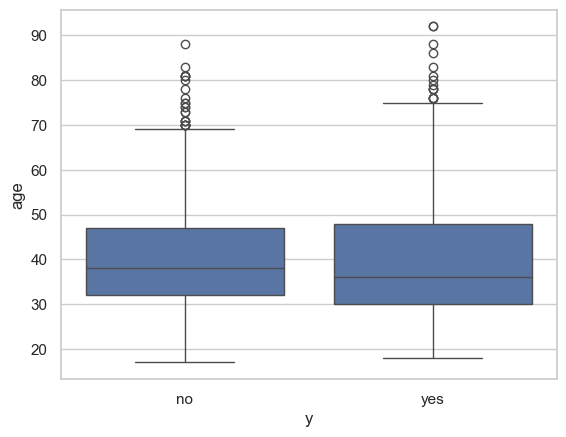

<Figure size 1000x800 with 0 Axes>

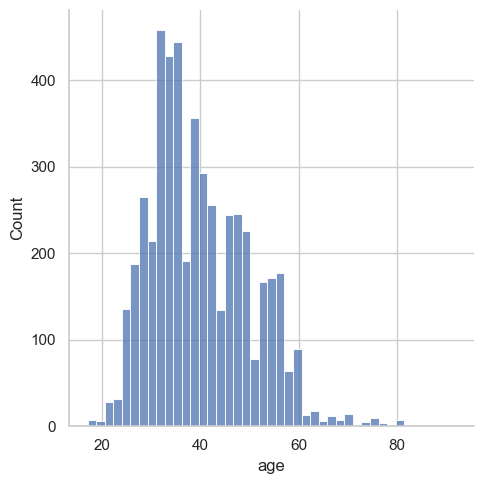

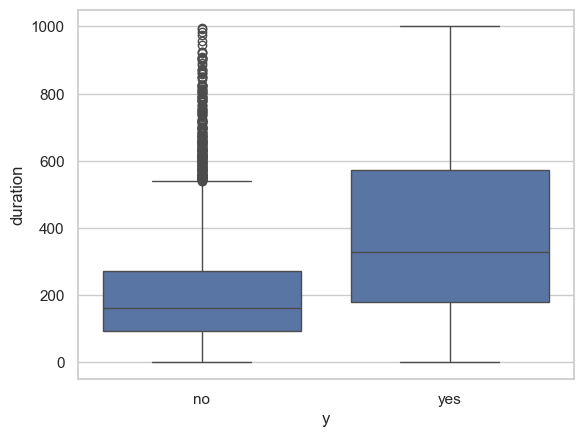

<Figure size 1000x800 with 0 Axes>

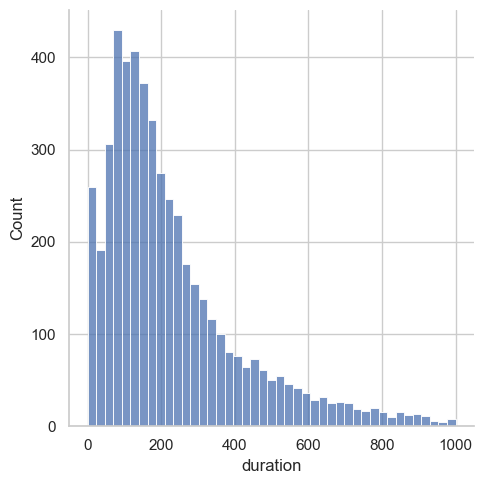

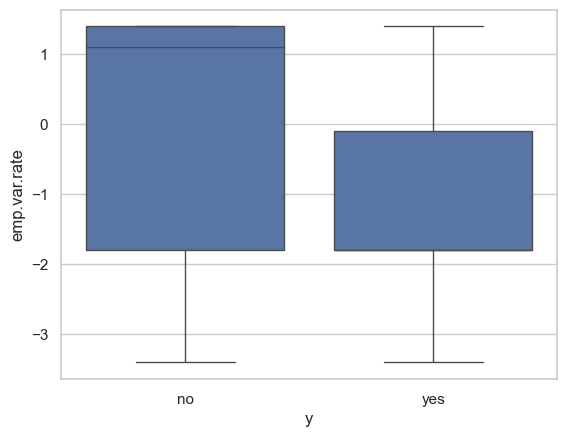

<Figure size 1000x800 with 0 Axes>

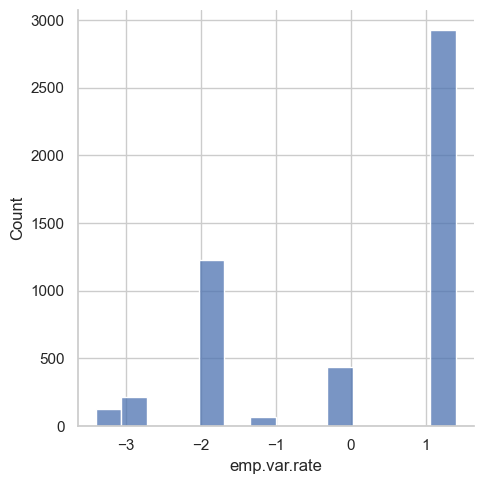

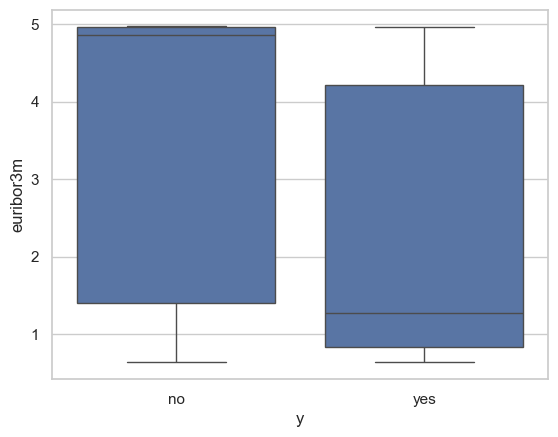

<Figure size 1000x800 with 0 Axes>

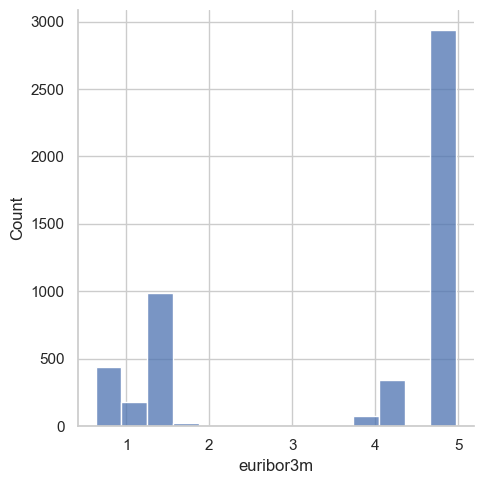

In [10]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age")
plt.show()

plt.figure(figsize=(10,8))
sns.displot(data['age'])
plt.show()

sns.boxplot(data=data, x="y", y="duration")
plt.show()

plt.figure(figsize=(10,8))
sns.displot(data['duration'])
plt.show()

%matplotlib inline
sns.boxplot(data=data, x="y", y="emp.var.rate")
plt.show()

plt.figure(figsize=(10,8))
sns.displot(data['emp.var.rate'])
plt.show()

%matplotlib inline
sns.boxplot(data=data, x="y", y="euribor3m")
plt.show()

plt.figure(figsize=(10,8))
sns.displot(data['euribor3m'])
plt.show()

<h1><b>Encoding</b></h1>

In [11]:
columns=data.select_dtypes(include=['object'])
for item in columns:
    data[item] = LabelEncoder().fit_transform(data[item])

data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.029200,3.72160,1.177200,3.755000,0.21500,1.046600,0.325400,0.369000,4.280200,2.010400,...,2.252200,0.228400,0.179600,0.924400,0.087200,93.581359,-40.533840,3.627654,5167.267280,0.116000
std,10.291002,3.59047,0.608173,2.150605,0.41135,0.987635,0.722786,0.482582,2.277526,1.410635,...,1.700463,1.372665,0.500194,0.371904,1.565161,0.575511,4.596007,1.730487,71.395051,0.320257
min,17.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,1.00000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,2.00000,1.000000,3.000000,0.00000,2.000000,0.000000,0.000000,4.000000,2.000000,...,2.000000,0.000000,0.000000,1.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,7.00000,2.000000,6.000000,0.00000,2.000000,0.000000,1.000000,6.000000,3.000000,...,3.000000,0.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,92.000000,11.00000,3.000000,7.000000,2.00000,2.000000,2.000000,1.000000,9.000000,4.000000,...,10.000000,21.000000,6.000000,2.000000,1.400000,94.767000,-26.900000,4.970000,5228.100000,1.000000


In [12]:
columns=test.select_dtypes(include=['object'])
for item in columns:
    test[item] = LabelEncoder().fit_transform(test[item])

test.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.307000,3.785000,1.161000,3.79800,0.189000,1.071000,0.357000,0.350000,4.388000,2.027000,...,2.210000,0.318000,0.219000,0.918000,-0.023700,93.569608,-40.578700,3.481635,5160.044300,0.105000
std,10.835227,3.567001,0.614375,2.14518,0.391705,0.983324,0.747067,0.477208,2.307115,1.383541,...,1.662126,1.715756,0.580841,0.396779,1.583033,0.592058,4.648846,1.784278,76.674155,0.306707
min,18.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,1.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,38.000000,2.000000,1.000000,3.00000,0.000000,2.000000,0.000000,0.000000,5.000000,2.000000,...,2.000000,0.000000,0.000000,1.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,48.000000,7.000000,2.000000,6.00000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,3.000000,0.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,11.000000,3.000000,7.00000,1.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,10.000000,18.000000,5.000000,2.000000,1.400000,94.767000,-26.900000,4.970000,5228.100000,1.000000


Text(0.5, 1.05, 'Pearson correlation of Features')

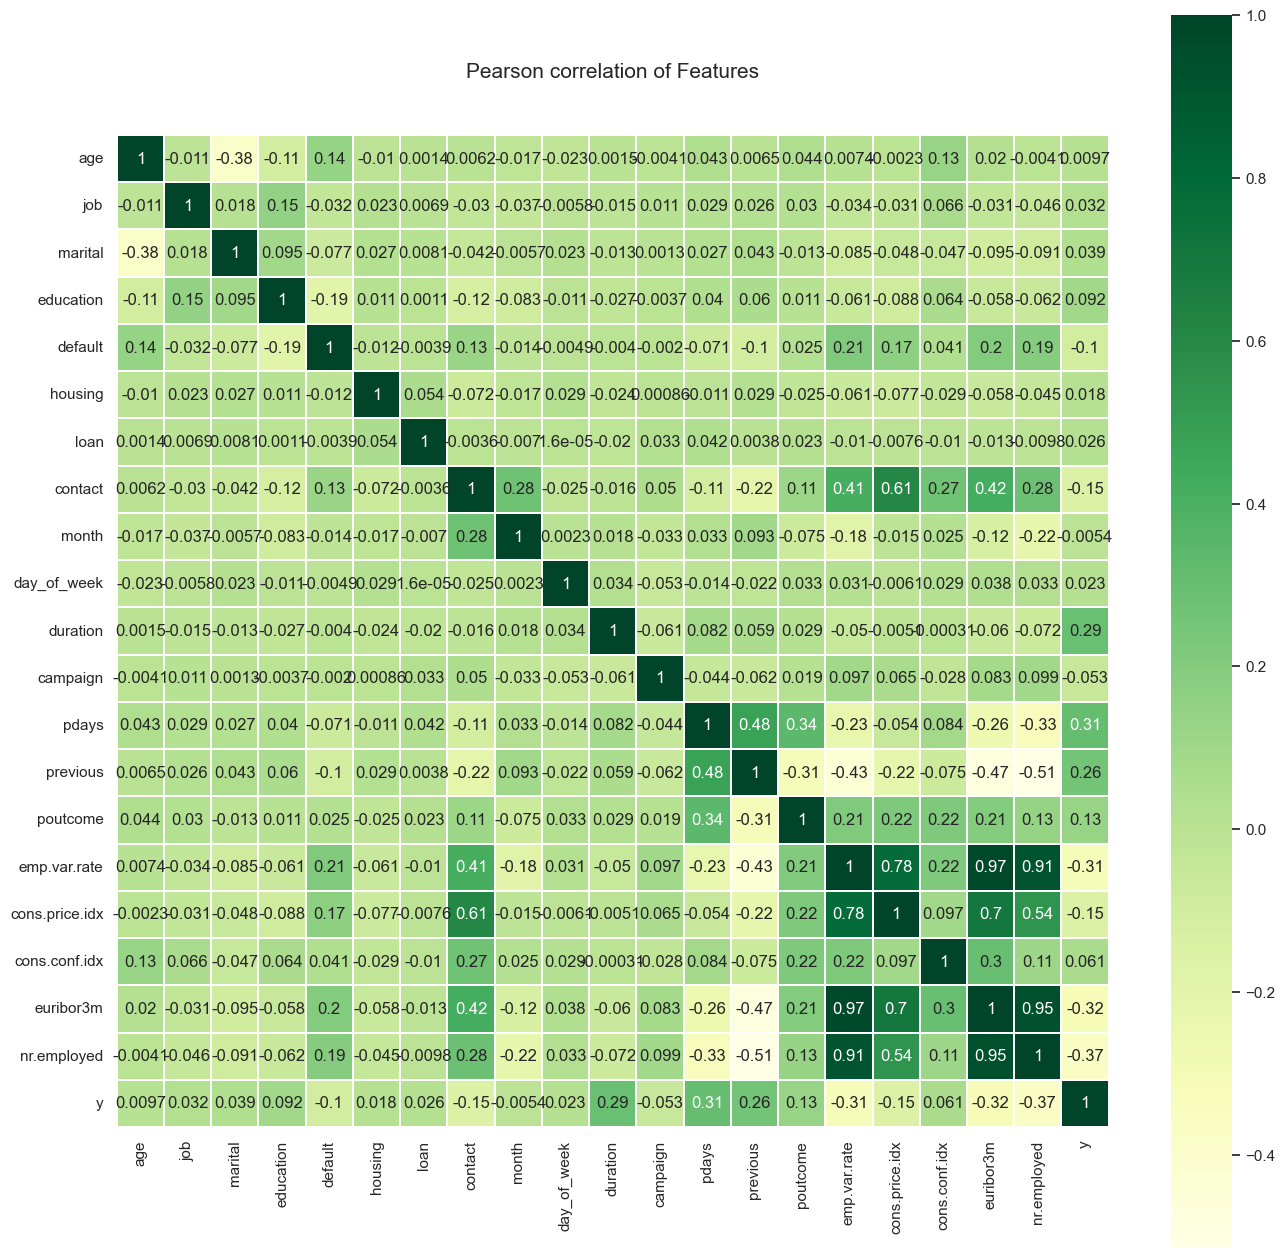

In [13]:
#plotting the correlation matrix
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(16,16))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

<h1><b>Modelling</b></h1>

In [14]:
df=data.copy()
#First of all we will divide our dataset into two variables X as the features we defined earlier and y as the 'y' the target value we want to predict.
y = df['y']
X = df.drop('y', axis = 1)

Use SMOTE to handle imbalanced classification problems by generating synthetic samples to balance the dataset, ensuring there are enough samples for each category to train the model. This helps improve model performance, especially when dealing with imbalanced data

In [15]:
smote = SMOTE() # Synthetic Minority Oversampling TEchnique
X, y = smote.fit_resample(X,y)

Analyzing VIF can help determine which independent variables have multicollinearity, so that steps can be taken to improve the stability and interpretability of the multiple linear regression model. Usually, when the VIF value is greater than a certain threshold (such as 5 or 10), we can consider removing the independent variables with higher correlation

In [16]:
vif_data = pd.DataFrame()
vif_data["target"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,target,VIF
0,age,17.366942
1,job,2.224110
2,marital,5.145898
3,education,5.145144
4,default,1.297412
5,housing,2.084358
6,loan,1.211641
7,contact,2.185337
8,month,5.546838
9,day_of_week,3.173084


In [17]:
df=data.copy()
tf=test.copy()
columns =['age','marital', 'education','month','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx',
                           'euribor3m','nr.employed']
for item in columns:
    df.drop(item,axis=1,inplace=True)
    tf.drop(item,axis=1,inplace=True)

X_train=df.drop('y',axis=1)
y_train=df.y
X_test=tf.drop('y',axis=1)
y_test=tf.y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [19]:
scaler = StandardScaler()
features = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=features)

<h2>Decision Tree</h2>

<h3>Score Model in default Parameters</h3>

Training Data Set balanced accuracy:  0.9979638009049774
Training Data F1 Score  0.9979638009049774
Validation Mean F1 Score:  0.889838415041712
Validation Mean balanced accuracy:  0.8864253393665159


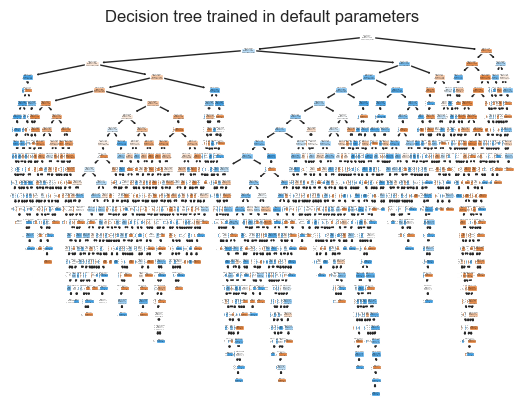

In [20]:
#Choose Classifier and fit the model use default attribute
DCT = DecisionTreeClassifier()
DCT.fit(X_train,y_train)
y_predict = DCT.predict(X_train)

# balanced accuracy score
print("Training Data Set balanced accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict))
print("Validation Mean F1 Score: ",cross_val_score(DCT,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean balanced accuracy: ",cross_val_score(DCT,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())
#plot the decision tree with unlimited max depth
plot_tree(DCT, filled=True)
plt.title("Decision tree trained in default parameters")
plt.show()

<h3>Model Performance in different Parameter</h3>

In [21]:
#Grid Search
param_grid = [
        {
            'max_depth' : range(3,20),
            'min_samples_leaf' : range(8,20),
        }
       ]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'max_depth': 18, 'min_samples_leaf': 9}


<h3>Prediction Summary</h3>

In [37]:
DCT = DecisionTreeClassifier(max_depth=18,min_samples_leaf = 9)
t1=time()
DCT.fit(X_train,y_train)
y_predict = DCT.predict(X_test)
time_DCT = time()-t1

#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))

# balanced accuracy score
DCT_SC = balanced_accuracy_score(y_predict,y_test)
print(f"{round(DCT_SC*100,2)}% Accurate")
bm_DCT=round(DCT_SC*100,2)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       895
           1       0.84      0.72      0.77       895

    accuracy                           0.79      1790
   macro avg       0.79      0.79      0.79      1790
weighted avg       0.79      0.79      0.79      1790

79.44% Accurate


<h3>Visualize Decision Tree</h3>

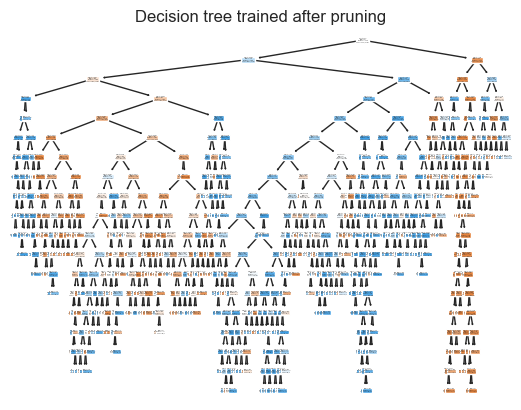

In [38]:
plt.figure()
tree_clf = tree.DecisionTreeClassifier(max_depth=18,min_samples_leaf = 9)
tree_clf.fit(X_train,y_train)
plot_tree(tree_clf, filled=True)
plt.title("Decision tree trained after pruning")
plt.show()

<h2>Neural Networks </h2>

In [24]:
#Choose Classifier and fit the model use default attribute
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

y_predict = MLP.predict(X_train)

# balanced accuracy score
print("Training Data Set balanced accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict))
print("Validation Mean F1 Score: ",cross_val_score(MLP,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean balanced accuracy: ",cross_val_score(MLP,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())

Training Data Set balanced accuracy:  0.8700226244343892
Training Data F1 Score  0.8703306624534477
Validation Mean F1 Score:  0.8541697746656529
Validation Mean balanced accuracy:  0.8528280542986426


<h3>Model Performance in different Parameter</h3>

In [25]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'adam'],
            'hidden_layer_sizes': [
             (5,),(5,5),(5,5,5),(10,),(10,10),(10,10,10),(20,),(20,20),(50,)
             ]
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'logistic', 'hidden_layer_sizes': (10, 10), 'solver': 'adam'}


<h3>Prediction Summary</h3>

In [26]:
MLP_sum = MLPClassifier(solver='adam',hidden_layer_sizes=(5, 5),activation='logistic')
t1=time()
MLP_sum.fit(X_train, y_train)
y_predict = MLP_sum.predict(X_test)
time_MLP = time()-t1
#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))
# balanced accuracy score
MLP_SC1 = balanced_accuracy_score(y_predict,y_test)
print(f"{round(MLP_SC1*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       895
           1       0.79      0.83      0.81       895

    accuracy                           0.81      1790
   macro avg       0.81      0.81      0.81      1790
weighted avg       0.81      0.81      0.81      1790

80.65% Accurate


In [36]:
MLP_sum2 = MLPClassifier(solver='adam',hidden_layer_sizes=(10,10),activation='logistic')
MLP_sum2.fit(X_train, y_train)
y_predict = MLP_sum2.predict(X_test)
#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))
# balanced accuracy score
MLP_SC2 = balanced_accuracy_score(y_predict,y_test)
print(f"{round(MLP_SC2*100,2)}% Accurate")
bm_MLP=round(max(MLP_SC1,MLP_SC2)*100,2)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       895
           1       0.78      0.86      0.82       895

    accuracy                           0.81      1790
   macro avg       0.81      0.81      0.81      1790
weighted avg       0.81      0.81      0.81      1790

81.31% Accurate


<h2>Boost (adaBoost)</h2>

In [28]:
#Choose Classifier and fit the model use default attribute
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train)

y_predict = ADA.predict(X_train)

# balanced accuracy score
print("Training Data Set balanced accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict))
print("Validation Mean F1 Score: ",cross_val_score(ADA,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean balanced accuracy: ",cross_val_score(ADA,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())

Training Data Set balanced accuracy:  0.8653846153846154
Training Data F1 Score  0.8658701532912534
Validation Mean F1 Score:  0.8583413374718244
Validation Mean balanced accuracy:  0.8587104072398191


<h3>Model Performance in different Parameter</h3>

In [29]:
#Grid Search
param_grid = [
        {
            'n_estimators' : range(1,100,10)
        }
       ]

clf = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'n_estimators': 91}


<h3>Prediction Summary</h3>

In [35]:
ADA = AdaBoostClassifier(n_estimators = 91)
t1=time()
ADA.fit(X_train, y_train)
y_predict = ADA.predict(X_test)
time_ADA = time()-t1

#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))

# balanced accuracy score
ADA_SC = balanced_accuracy_score(y_predict,y_test)
print(f"{round(ADA_SC*100,2)}% Accurate")
bm_Boost=round(ADA_SC*100,2)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       895
           1       0.84      0.79      0.81       895

    accuracy                           0.82      1790
   macro avg       0.82      0.82      0.82      1790
weighted avg       0.82      0.82      0.82      1790

81.83% Accurate


<h2>Logistic Regression</h2>

In [31]:
#Choose Classifier and fit the model use default attribute
LGR = LogisticRegression()
LGR.fit(X_train, y_train)

y_predict = LGR.predict(X_train)

# balanced accuracy score
print("Training Data Set balanced accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict))
print("Validation Mean F1 Score: ",cross_val_score(ADA,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean balanced accuracy: ",cross_val_score(ADA,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())

Training Data Set balanced accuracy:  0.766628959276018
Training Data F1 Score  0.7721197393129349
Validation Mean F1 Score:  0.8598905782051238
Validation Mean balanced accuracy:  0.8602941176470587


<h3>Prediction Summary</h3>

In [32]:
LGR = LogisticRegression()
t1=time()
LGR.fit(X_train, y_train)
y_predict = LGR.predict(X_test)
time_LGR = time()-t1

#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))

# balanced accuracy score
LGR_SC = balanced_accuracy_score(y_predict,y_test)
print(f"{round(LGR_SC*100,2)}% Accurate")
bm_Reg=round(LGR_SC*100,2)

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       895
           1       0.75      0.84      0.79       895

    accuracy                           0.78      1790
   macro avg       0.78      0.78      0.78      1790
weighted avg       0.78      0.78      0.78      1790

78.04% Accurate


<h2>Compare Prediction Performances by different models</h2>

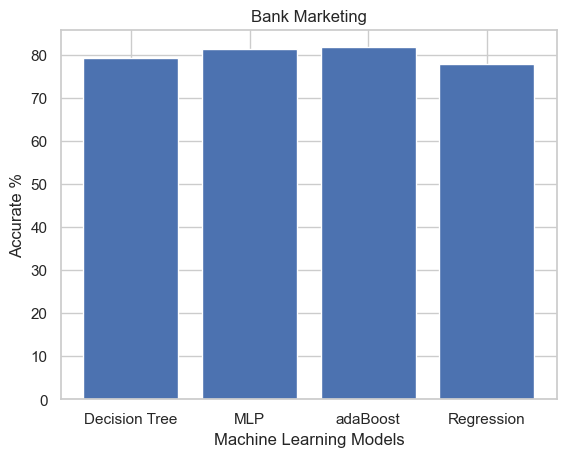

[79.44, 81.31, 81.83, 78.04]


In [39]:
data = [bm_DCT, bm_MLP, bm_Boost, bm_Reg]
labels = ['Decision Tree', 'MLP', 'adaBoost', 'Regression']
plt.bar(range(len(data)), data, tick_label=labels)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accurate %')
plt.title('Bank Marketing')
plt.show()
print(data)

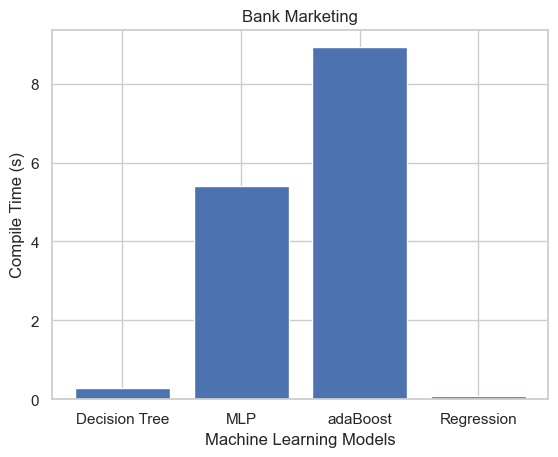

[0.2807900905609131, 5.4091010093688965, 8.921339988708496, 0.07095599174499512]


In [40]:
data = [time_DCT, time_MLP, time_ADA, time_LGR]
labels = ['Decision Tree', 'MLP', 'adaBoost', 'Regression']
plt.bar(range(len(data)), data, tick_label=labels)
plt.xlabel('Machine Learning Models')
plt.ylabel('Compile Time (s)')
plt.title('Bank Marketing')
plt.show()
print(data)